# Linear Regression in tensorflow

## 1.1  Linear Regression with one variable (simple linear regression)

<img src="simple_lin_reg.PNG">

#### Problem statement- To predict profits for a food truck in a city.
#### Given data - profit of the food truck in '$10,000s' based on populations of different cities in 10,000s

In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import tensorflow as tf

In [2]:
tf.__version__

'1.4.0'

### Load the data file

In [3]:
path = os.getcwd() + '\ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
num_of_samples = data.shape[0]
print ('Num of samples: ', num_of_samples)

Num of samples:  97


### defining the input and output data

In [6]:
data_x,data_y = data['Population'],data['Profit']


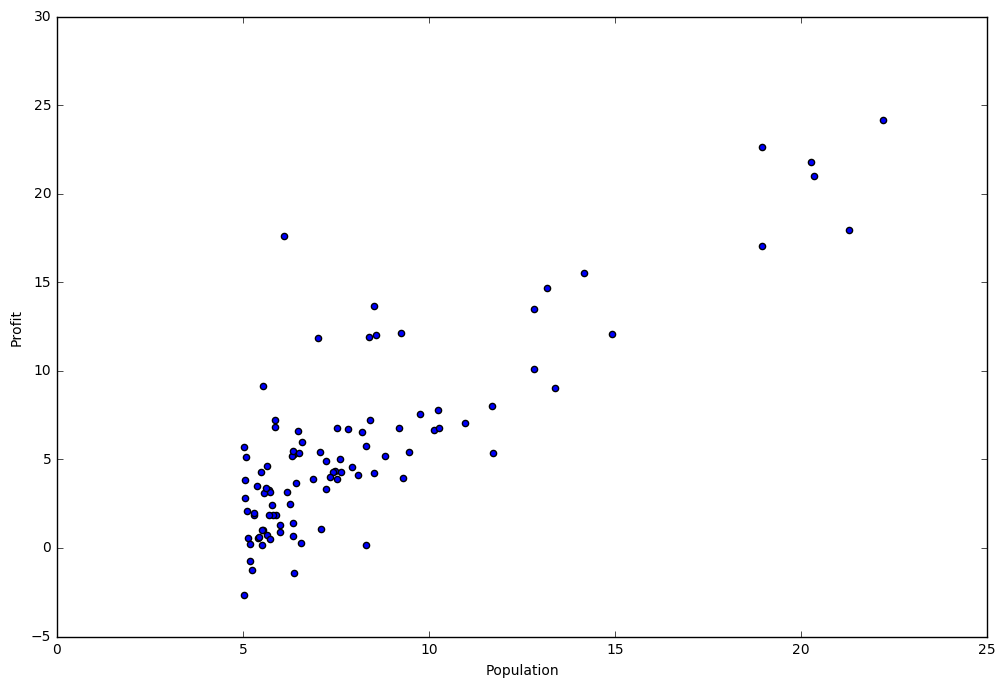

In [7]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

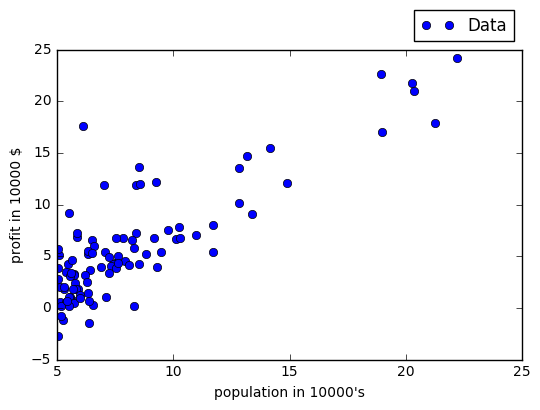

In [8]:
plt.plot(data_x,data_y,'o')
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [9]:
print (data_x[0:1].shape,data_y[0:1].shape)

(1,) (1,)


In [10]:
print (data_x[0:5],data_y[0:5])

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64 0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


#### simple linear reg model, a = w.x  + b

#### create placeholders for input X (population) and label Y (profit)

In [11]:
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32 , name = "input")
    Y = tf.placeholder(tf.float32 , name = "output")

#### Create weight and bias variable initialized to 0

In [12]:
with tf.name_scope('parameters'):
    w = tf.Variable(0.0,name='weights')
    b = tf.Variable(0.0,name='bias')

#### Define the linear regression model to predict the output profit based on input population

In [13]:
with tf.name_scope('regression_model'):
    Y_predicted = X*w + b

#### Define the square error function as loss function to monitor the performance of model as well as for gradient descent

In [14]:
with tf.name_scope('loss_function'):
    loss = tf.reduce_mean(tf.square(Y-Y_predicted,name = 'loss'))


#### Define a gradient descent optimizer for optimizing the weights and biases of the model

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)


#### creating summary for writing loss function in event file

In [16]:
# Add summary ops to collect data
W_hist = tf.summary.histogram("weights", w)
b_hist = tf.summary.histogram("biases", b)
y_hist = tf.summary.histogram("y_predicted", Y_predicted)

cost = tf.summary.scalar('loss',loss)

# merge all the summaries
merged_summaries = tf.summary.merge_all()


#### Saving the trained model using saver op

In [17]:
# Create a Saver object
saver = tf.train.Saver()

#### Launch the defined tensorflow operations through a session

In [18]:
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    # create a summary writer
    summary_writer = tf.summary.FileWriter('./simple_lin_reg_summary',sess.graph)
    # initialize the defined w and b variables
    sess.run(tf.global_variables_initializer())
    
    # Train the model
    for i in range(300): # train the model for number of  iterations
        # for every iteration all the data is passed
        for x,y in zip(data_x,data_y):
            # run the training function to minimize the loss using 
            #defined optimizer
            _,loss_v,summary=sess.run([train_op,loss,merged_summaries],feed_dict={X:x,Y:y})
        cost_history=np.append(cost_history,loss_v)
            #summary_writer.add_summary(summary,i)
        # output the weight and bias value after every iteration
        if i%20==0:
            print ('loss is: ',loss_v)
            summary_writer.add_summary(summary,i)
    w_value,b_value = sess.run([w,b])
        #print (w_value,b_value)
        # print the loss function after every iteration
        #loss_value = sess.run(loss)
    # Save the final model
    saver.save(sess, '.\saved_model\model_final_lin_reg')
summary_writer.close()

loss is:  5.84096
loss is:  3.01131
loss is:  1.8686
loss is:  1.36395
loss is:  1.12419
loss is:  1.00424
loss is:  0.942223
loss is:  0.909528
loss is:  0.892096
loss is:  0.882743
loss is:  0.877706
loss is:  0.874992
loss is:  0.873526
loss is:  0.872735
loss is:  0.872306


301


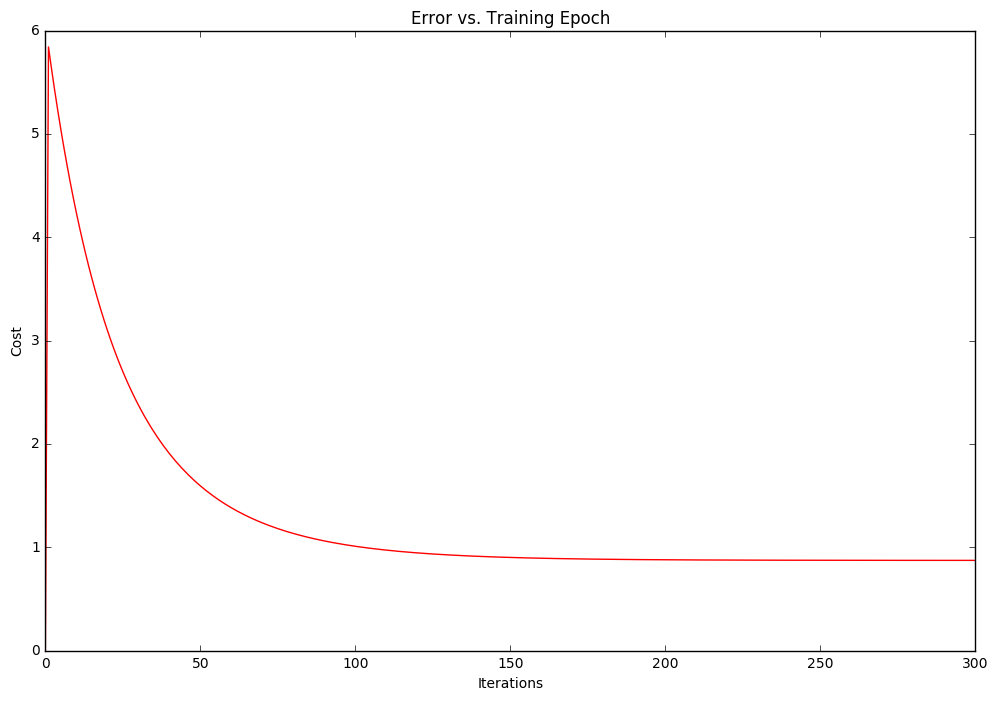

In [19]:
len = cost_history.shape[0]
print (len)
iters = len
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [20]:
#test 
x_test = np.array(data_x[0:5])
y_test = np.array(data_y[0:5])
y_test_predicted=x_test*w_value+b_value
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [ 2.16433865  1.58426437  4.56322071  3.05387221  1.91503819]
true_value:  [ 17.592    9.1302  13.662   11.854    6.8233]


### Final trained parameters

In [21]:
print (w_value,b_value)

0.996007 -3.92136


In [22]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted=x_test*w_value+b_value
#y_test_predicted

### Plotting the simple linear regression model

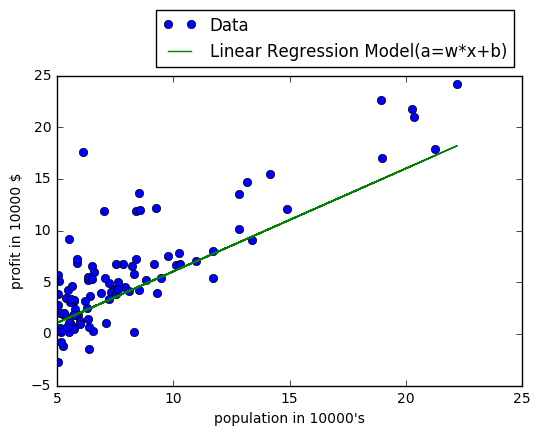

In [23]:
plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data', 'Linear Regression Model(a=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

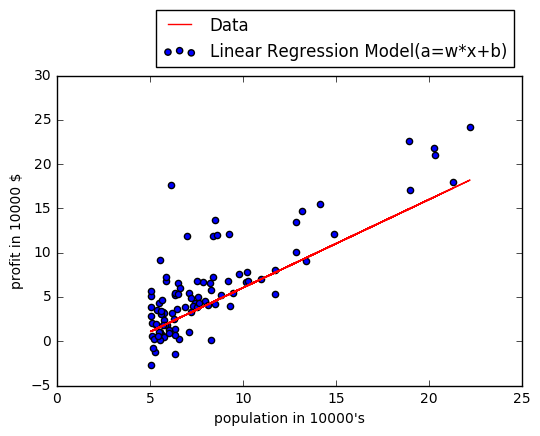

In [24]:
plt.scatter(x_test,y_test,marker="o")
plt.plot(x_test,y_test_predicted,"r-")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data', 'Linear Regression Model(a=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

### Using the saved model


In [25]:
tf.reset_default_graph()  
with tf.Session() as sess:  
    imported_meta = tf.train.import_meta_graph("./saved_model/model_final_lin_reg.meta")
    imported_meta.restore(sess, tf.train.latest_checkpoint('./saved_model/'))
    w_final = sess.run(('parameters/weights:0'))
    b_final = sess.run(('parameters/bias:0'))
    print("wieight final: {}".format (w_final))
    print("bias final: {}".format (b_final))

INFO:tensorflow:Restoring parameters from ./saved_model/model_final_lin_reg
wieight final: 0.9960066676139832
bias final: -3.9213616847991943
